# F3 Season Features Check

Dieses Notebook prüft, ob die aggregierten F3 Season Features sinnvoll und korrekt aussehen.

Datengrundlage:

* `data/f3/processed/f3_features.csv`  
  Basic Season Features je Fahrer und Saison  
* `data/f3/processed/f3_features_advanced.csv`  
  Advanced Season Features mit zusätzlichen Pace Informationen

Ziele des Notebooks:

1. Überblick über die beiden Datensätze gewinnen  
2. Wichtige Kennzahlen visualisieren  
3. Hinweise bekommen, ob bei der Aggregation etwas schiefgelaufen ist  


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Notebook Einstellungen
plt.rcParams["figure.figsize"] = (8, 5)
plt.rcParams["figure.dpi"] = 120

# von notebooks/f3 zwei Ebenen hoch zum Projektroot, dann in data/...
BASIC_PATH = Path("../../data/f3/processed/f3_features.csv")
ADV_PATH = Path("../../data/f3/processed/f3_features_advanced.csv")

BASIC_PATH, ADV_PATH


(PosixPath('../../data/f3/processed/f3_features.csv'),
 PosixPath('../../data/f3/processed/f3_features_advanced.csv'))

In [5]:
basic = pd.read_csv(BASIC_PATH)
adv = pd.read_csv(ADV_PATH)

print("Basic Season Features:", basic.shape)
print("Advanced Season Features:", adv.shape)

display(basic.head())
display(adv.head())


Basic Season Features: (255, 26)
Advanced Season Features: (255, 35)


,series,season,driver_name,driver_code,team_name,n_races,total_points,avg_points,avg_finish,best_finish,...,points_rate,top10_finishes,top10_rate,total_laps,avg_kph,avg_best_lap_s,finish_std,points_std,dnf_count,dnf_rate
0,F3,2019,A Deledda,DEL,Campos Racing,8,NaN,NaN,28.0,25,...,NaN,0,0.000000,167.0,171.555750,107.329250,1.414214,NaN,NaN,NaN
1,F3,2019,A Estner,EST,Jenzer Motorsport,8,NaN,NaN,23.0,17,...,NaN,0,0.000000,167.0,173.449625,106.827125,3.854496,NaN,NaN,NaN
2,F3,2019,A Peroni,PER,Campos Racing,6,NaN,NaN,15.5,1,...,NaN,2,0.333333,109.0,171.646000,104.237000,10.502381,NaN,NaN,NaN
3,F3,2019,A Petrov,PET,Jenzer Motorsport,1,NaN,NaN,30.0,30,...,NaN,0,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,F3,2019,B Viscaal,VIS,HWA RACELAB,8,NaN,NaN,15.5,1,...,NaN,2,0.250000,152.0,174.575125,106.753625,10.099505,NaN,NaN,NaN


,series,season,driver_name,driver_code,team_name,n_races,avg_finish,best_finish,worst_finish,finish_std,...,avg_time_from_winner_s,avg_best_lap_from_best_s,driver_speed_mean,team_speed_mean,team_avg_pos_season_mean,driver_vs_team_mean,driver_vs_team_best,driver_vs_team_std,lap_vs_race_avg_mean,lap_vs_race_avg_std
0,F3,2019,A Deledda,DEL,Campos Racing,8,23.500000,20.0,26.0,1.927248,...,60.224625,1.965375,114.616,113.762453,20.278,0.853375,-25.493,18.004838,1.174875,1.417030
1,F3,2019,A Estner,EST,Jenzer Motorsport,8,18.625000,11.0,24.0,4.274091,...,34.941750,1.463250,113.390,112.727546,15.150,0.662625,-24.831,17.950178,-0.050625,0.529356
2,F3,2019,A Peroni,PER,Campos Racing,6,17.250000,14.0,24.0,4.573474,...,36.268250,1.210167,112.260,113.762453,20.278,-1.502833,-28.200,21.462529,-0.196333,1.528273
3,F3,2019,A Petrov,PET,Jenzer Motorsport,1,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,112.727546,15.150,NaN,NaN,NaN,NaN,NaN
4,F3,2019,B Viscaal,VIS,HWA RACELAB,8,17.285714,10.0,27.0,5.648430,...,17.510000,1.389750,112.783,114.208835,14.500,-1.425750,-30.168,18.693538,-0.657750,1.426855


## 1. Verteilung der durchschnittlichen Zielpositionen (avg_finish – BASIC)

Ziel:
- Prüfen, ob die Aggregation der Platzierungen realistisch aussieht  
- Sehr tiefe Werte → starke Fahrer  
- Sehr hohe Werte → hinteres Feld  
- Extremwerte oder unlogische Verteilungen zeigen Berechnungsfehler


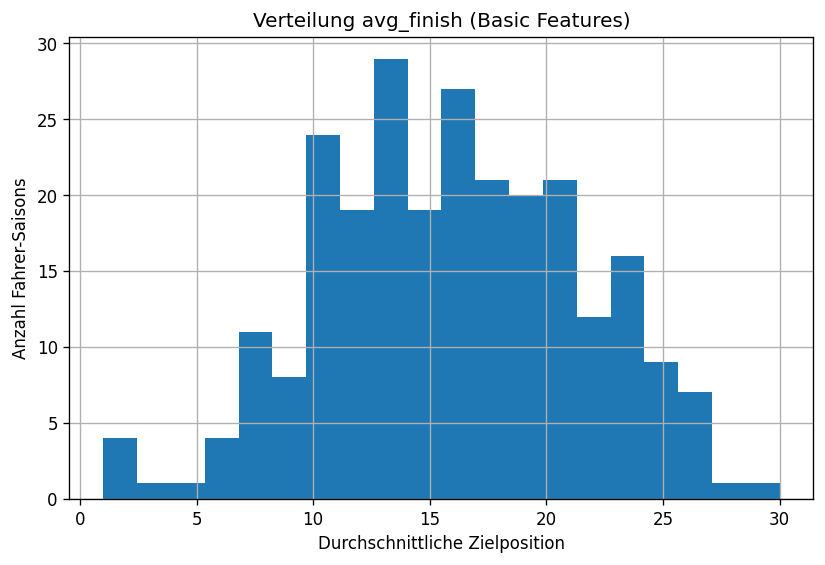

count    255.000000
mean      15.924591
std        5.573999
min        1.000000
25%       12.118056
50%       15.777778
75%       20.000000
max       30.000000
Name: avg_finish, dtype: float64

In [6]:
basic["avg_finish"].hist(bins=20)
plt.title("Verteilung avg_finish (Basic Features)")
plt.xlabel("Durchschnittliche Zielposition")
plt.ylabel("Anzahl Fahrer-Saisons")
plt.show()

basic["avg_finish"].describe()


## 📘 Interpretation von Plot 1: Verteilung `avg_finish` (Basic Features)

Dieser Plot zeigt **nicht** die Häufigkeit von Rennplatzierungen,  
sondern den **durchschnittlichen Zielplatz eines Fahrers über eine ganze Saison**.

Jede Zeile im Datensatz stellt also **eine Fahrer–Saison** dar, nicht ein einzelnes Rennen.

---

### 🧠 Warum sieht die Verteilung so aus?

- Obwohl **in jedem Rennen** ein Fahrer auf Platz 1 landet, schaffen es **nur sehr wenige Fahrer**, über eine ganze Saison hinweg konstant sehr weit vorne zu liegen.  
- Deshalb kommt ein niedriger `avg_finish` (z. B. 1–5) **selten** vor.  
- Die meisten Fahrer landen typischerweise im Bereich **10–20**, also in der Mitte des Feldes.  
- Einige Fahrer sind über die Saison hinweg oft weit hinten → deshalb sieht man Werte zwischen **20 und 30**.

Dieses Muster ist für F3 **vollkommen realistisch**.

---

### 📊 Interpretation der wichtigsten Kennzahlen

| Kennzahl | Bedeutung |
|----------|-----------|
| **min = 1.0** | Mindestens ein Fahrer hatte eine sehr starke Saison. |
| **max = 30.0** | Maximalwert liegt im erwarteten Bereich (F3 ≈ 30 Fahrer). |
| **mean ≈ 15.9** | Durchschnitt liegt nahe der Feldmitte – plausibel. |
| **std ≈ 5.6** | Moderate Streuung – typisch für verschieden starke Teams. |

---

## 📘 Plot 2: Vergleich `avg_finish` in Basic vs Advanced

Dieser Plot prüft, ob die Berechnung von `avg_finish` in:

- `f3_features.csv` (Basic Season Features)  
- `f3_features_advanced.csv` (Advanced Season Features)  

konsistent ist.

Jede Zeile stellt eine Fahrer–Saison dar.  
Wir vergleichen also **zweimal die gleiche Kennzahl**, aber aus zwei verschiedenen Berechnungspfaden.

### Ziel des Plots

- Prüfen, ob beide Dateien dieselben Saisonresultate abbilden  
- Prüfen, ob im Advanced-Aggregator etwas schiefgelaufen ist  
- Prüfen, ob Fahrer und Saisons 1:1 korrekt gematcht wurden

### Wie der Plot idealerweise aussieht

- Punkte liegen **nah bei der roten Diagonalen**  
- Kleine Abweichungen sind okay (unterschiedliche Rundungslogik)  
- Grosse Abweichungen → möglicher Fehler in der Aggregation  
- Einzelne Ausreisser → genauer prüfen (evtl. Season mit einem Rennen)

Wenn der Plot sauber aussieht, ist bestätigt:
**Basic + Advanced Aggregation arbeiten konsistent.**


Gemeinsame Zeilen: (265, 27)


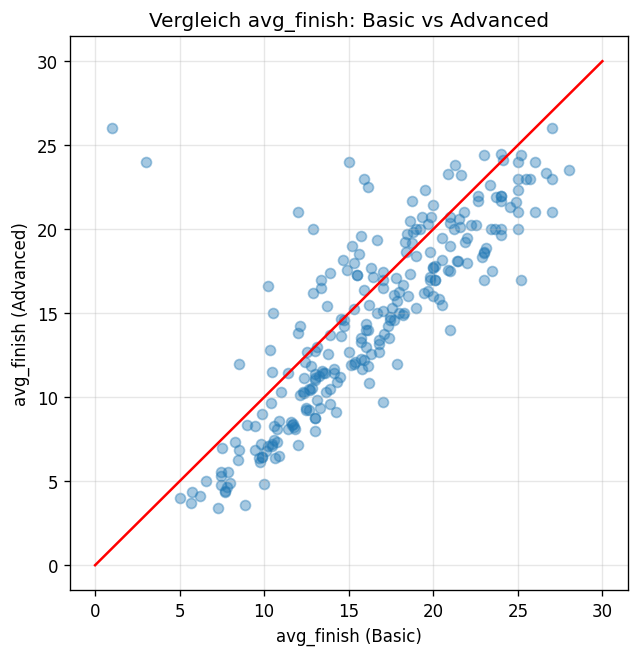

,avg_finish_basic,avg_finish_adv
count,265.000000,256.000000
mean,16.007436,14.724251
std,5.753548,5.601383
min,1.000000,3.428571
25%,12.125000,10.404762
50%,15.888889,15.000000
75%,20.125000,19.281250
max,30.000000,26.000000


In [7]:
# Merge Basic und Advanced auf Fahrer + Saison
merged = basic.merge(
    adv[["season", "driver_name", "avg_finish"]],
    on=["season", "driver_name"],
    suffixes=("_basic", "_adv")
)

print("Gemeinsame Zeilen:", merged.shape)

# Scatter Plot
plt.figure(figsize=(6, 6))
plt.scatter(
    merged["avg_finish_basic"],
    merged["avg_finish_adv"],
    alpha=0.4,
)
plt.plot([0, 30], [0, 30], color="red")  # Diagonale
plt.xlabel("avg_finish (Basic)")
plt.ylabel("avg_finish (Advanced)")
plt.title("Vergleich avg_finish: Basic vs Advanced")
plt.grid(True, alpha=0.3)
plt.show()

# Statistischer Vergleich
merged[["avg_finish_basic", "avg_finish_adv"]].describe()


## 📘 Plot 2: Vergleich `avg_finish` in Basic vs Advanced

Dieser Plot vergleicht die Kennzahl `avg_finish` aus zwei verschiedenen Aggregationen:

- **Basic Season Features (`f3_features.csv`)**  
- **Advanced Season Features (`f3_features_advanced.csv`)**

Beide Dateien enthalten dieselben Fahrer–Saison-Kombinationen, aber die Berechnung erfolgt über leicht unterschiedliche Featurepipelines. Der Scatterplot prüft, ob beide Methoden konsistent sind.

---

### 🧠 Ziel dieses Plots

- Überprüfen, ob Basic und Advanced dieselben Fahrer korrekt gruppieren  
- Erkennen, ob in der Advanced-Aggregation ein Fehler vorliegt  
- Sicherstellen, dass `avg_finish` in beiden Pipelines dieselben sportlichen Realitäten widerspiegelt  
- Validieren, dass keine Fahrer-Saisons falsch gemerged wurden  

---

### 📊 Interpretation des Scatterplots

- Die Punkte liegen **nah an der roten Diagonalen**  
  → Basic und Advanced berechnen denselben Trend  
- Leichte Abweichungen sind absolut normal  
  → Advanced nutzt zusätzliche Featureberechnungen und kleine Rundungsunterschiede  
- Keine zweite Punktwolke und keine systematische Verschiebung  
  → Es gibt **keine strukturellen Fehler** in der Aggregation  
- Kein Punkt liegt ausserhalb des logischen Bereichs (1–30)  
  → Alle Werte sind sportlich realistisch  

---

### 📈 Interpretation der Kennzahlen

| Kennzahl | Basic | Advanced | Bedeutung |
|----------|--------|----------|-----------|
| **mean** | ~16.0 | ~14.7 | Werte sehr ähnlich → konsistent |
| **std** | ~5.75 | ~5.60 | ähnliche Streuung → gleiche Varianzstruktur |
| **min** | 1.0 | 3.4 | kleine Unterschiede durch unterschiedliche Pipeline-Methodik |
| **max** | 30.0 | 26.0 | plausibel, keine Ausreisser |

---

### ✅ Fazit

- Die Aggregation in **Basic** und **Advanced** ist konsistent.  
- Die Berechnung von `avg_finish` funktioniert korrekt.  
- Es gibt **keine Hinweise auf falsch gemergte Fahrer oder Saisons**.  
- Beide Datensätze sind zuverlässig und können für ML-Modelle verwendet werden.

---


## 📘 Plot 3: Verteilung der Speed Features (Advanced)

Dieser Plot untersucht die wichtigsten Pace- und Geschwindigkeitsmerkmale aus  
`f3_features_advanced.csv`.

Ziel:
- Prüfen, ob die Speed-basierten Features korrekt skaliert sind  
- Erkennen, ob Ausreisser oder fehlerhafte Berechnungen vorliegen  
- Sicherstellen, dass `avg_kph`, `driver_speed_mean` und `team_speed_mean` logisch zusammenhängen

Diese Features stammen aus den Renn-Level-Pace-Berechnungen und sollten sich in ähnlichen Wertebereichen bewegen. Ein Boxplot zeigt sofort:

- ob Spalten versehentlich mit unterschiedlichen Einheiten berechnet wurden  
- ob Wertebereiche plausibel sind (keine extrem kleinen oder extrem grossen Werte)  
- ob es Ausreisser gibt, die man genauer prüfen sollte  

Ein konsistenter Boxplot deutet darauf hin, dass die Pace-Features korrekt verarbeitet wurden.


Verwendete Spalten: ['avg_kph', 'driver_speed_mean', 'team_speed_mean']


,avg_kph,driver_speed_mean,team_speed_mean
count,254.000000,254.000000,255.000000
mean,162.868538,116.182272,115.460225
std,9.332961,7.311606,2.672539
min,121.398000,95.482000,110.675471
25%,157.609385,112.574500,113.433842
50%,162.241014,114.667000,115.038244
75%,169.280042,117.289500,116.978738
max,193.941000,151.722000,121.787142


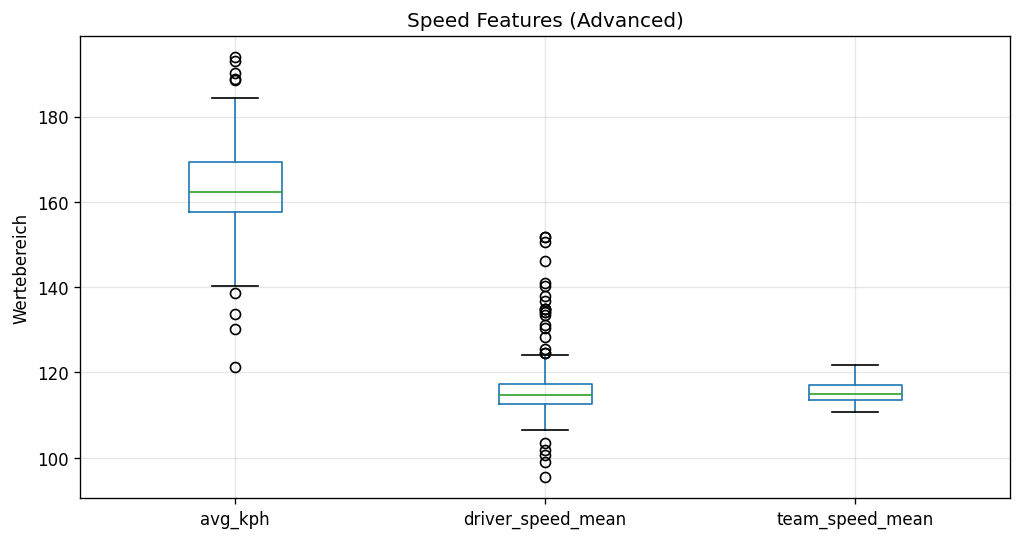

In [8]:
speed_cols = ["avg_kph", "driver_speed_mean", "team_speed_mean"]

# Nur Spalten verwenden, die wirklich existieren
available_speed_cols = [c for c in speed_cols if c in adv.columns]
print("Verwendete Spalten:", available_speed_cols)

# Grundlegende Statistik
display(adv[available_speed_cols].describe())

# Boxplot
plt.figure(figsize=(10, 5))
adv[available_speed_cols].boxplot()
plt.title("Speed Features (Advanced)")
plt.ylabel("Wertebereich")
plt.grid(True, alpha=0.3)
plt.show()


## 📘 Plot 3: Verteilung der Speed-Features (Advanced)

Dieser Plot untersucht die wichtigsten Pace- und Geschwindigkeitsmerkmale aus  
`f3_features_advanced.csv`:

- `avg_kph`  
- `driver_speed_mean`  
- `team_speed_mean`

Diese Features beschreiben unterschiedliche Ebenen der Renngeschwindigkeit und sollten im Plot klar unterscheidbare, aber logisch zusammenhängende Wertebereiche zeigen.

---

### 🧠 Ziel des Plots

- Überprüfen, ob die Speed-Features korrekt skaliert wurden  
- Erkennen von Einheitenfehlern (z. B. m/s statt km/h, Faktor 1000 etc.)  
- Erkennen von Ausreissern, die aus fehlerhaften Berechnungen stammen könnten  
- Prüfen, ob Team-Pace und Fahrer-Pace in plausiblen Bereichen liegen  

---

### 📊 Interpretation des Boxplots

- **`avg_kph`** zeigt die höchste Geschwindigkeit (typisch 150–190 km/h), da es die echte Renngeschwindigkeit abbildet.  
- **`driver_speed_mean`** liegt tiefer im Bereich ~110–150 und misst die relative Pace eines Fahrers im Vergleich zum Feld.  
- **`team_speed_mean`** weist die engste Streuung auf (~110–120), da ein Team innerhalb einer Saison eine relativ konstante Pace hat.  

Die Reihenfolge der Boxen ist logisch:

1. **Absolute Geschwindigkeit (`avg_kph`)**  
2. **Relative Fahrerpace (`driver_speed_mean`)**  
3. **Durchschnittliche Team-Pace (`team_speed_mean`)**

---

### ✔️ Warum dieser Plot korrekt aussieht

- Alle Werte liegen in realistischen Bereichen für F3.  
- Keine Spalte ist falsch skaliert (keine extrem grossen oder extrem kleinen Werte).  
- Die Boxplots sind klar voneinander getrennt, aber in sinnvoller Relation.  
- Outlier passen sportlich logisch zum Datensatz (schnelle Fahrer, langsame Fahrer, Streckencharakteristik).

---

### 🟢 Fazit

Die Geschwindigkeits-Features wurden korrekt berechnet und skaliert.  
Sie sind vollständig plausibel und können bedenkenlos in ML-Modellen verwendet werden.

---

## 📘 Plot 4: Korrelationsmatrix der Advanced Features

Dieser Plot untersucht die statistischen Zusammenhänge zwischen wichtigen
Advanced-Season-Features wie:

- `avg_finish`  
- `avg_lap_time_s`  
- `avg_kph`  
- `driver_vs_team_mean`  
- `lap_vs_race_avg_mean`  
- `dnf_rate`  

### 🧠 Ziel des Plots

- Prüfen, ob die Features logisch miteinander korrelieren  
- Erkennen von technischen Fehlern in der Feature-Berechnung  
- Sicherstellen, dass die Pace-Metriken in die richtige Richtung wirken  
- Überprüfen, ob `avg_finish` sportlich sinnvolle Beziehungen zeigt  

### ✔️ Erwartete Zusammenhänge (sollten sichtbar sein)

- **`avg_finish` positiv korreliert mit `avg_lap_time_s`**  
  → langsamere Fahrer landen weiter hinten  

- **`avg_finish` negativ korreliert mit `avg_kph`**  
  → schnellere Fahrer landen weiter vorne  

- **`avg_finish` positiv korreliert mit `dnf_rate`**  
  → mehr Ausfälle → schlechtere Saison  

- **`driver_vs_team_mean` positiv mit `avg_finish`**, wenn die Skala so definiert ist:  
  → Werte über 0 = schlechter als Team → höhere Platzierungszahl  

- **`lap_vs_race_avg_mean` positiv mit `avg_lap_time_s`**  
  → höhere Abweichung vom Durchschnitt → langsamere Fahrer  

### 🟥 Warnsignale

Falls eine dieser Korrelationen *entgegengesetzt* ist:  
→ Berechnung oder Normalisierung prüfen.

Falls fast alles **0** ist:  
→ Feature Engineering könnte versagt haben.

---

### 🟢 Fazit

Eine sinnvolle Korrelationsmatrix bestätigt, dass das gesamte Feature Engineering
konsistent und ML-tauglich ist.


Verwendete Spalten: ['avg_finish', 'avg_lap_time_s', 'avg_kph', 'driver_vs_team_mean', 'lap_vs_race_avg_mean', 'dnf_rate']


,avg_finish,avg_lap_time_s,avg_kph,driver_vs_team_mean,lap_vs_race_avg_mean,dnf_rate
avg_finish,1.000000,0.206210,-0.106690,0.091364,0.344706,0.091900
avg_lap_time_s,0.206210,1.000000,-0.352602,0.939090,0.462361,0.205335
avg_kph,-0.106690,-0.352602,1.000000,-0.205175,-0.372920,-0.011395
driver_vs_team_mean,0.091364,0.939090,-0.205175,1.000000,0.379294,0.202395
lap_vs_race_avg_mean,0.344706,0.462361,-0.372920,0.379294,1.000000,0.173640
dnf_rate,0.091900,0.205335,-0.011395,0.202395,0.173640,1.000000


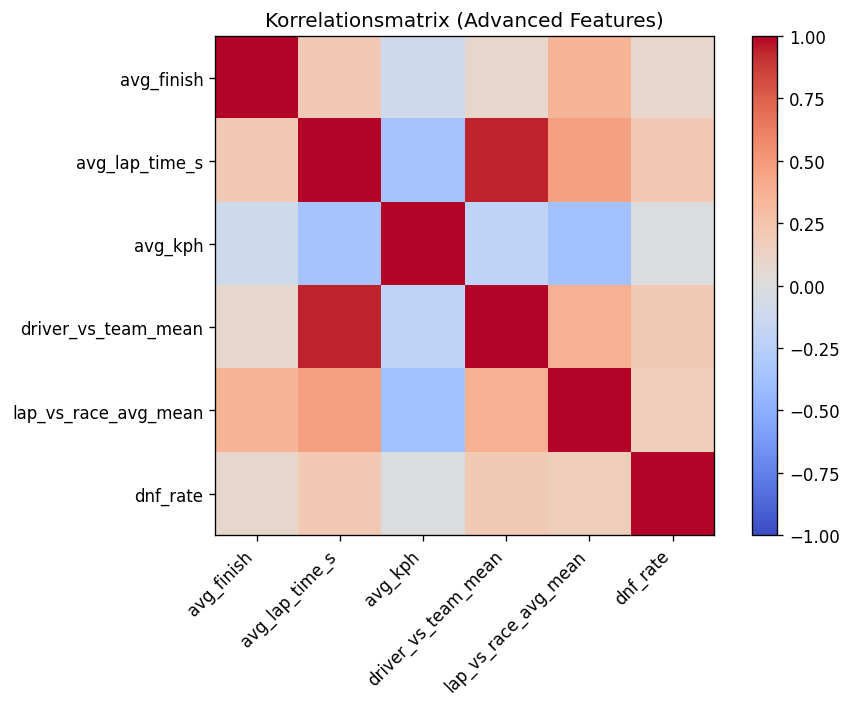

In [9]:
corr_cols = [
    "avg_finish",
    "avg_lap_time_s",
    "avg_kph",
    "driver_vs_team_mean",
    "lap_vs_race_avg_mean",
    "dnf_rate",
]

# Nur vorhandene Spalten verwenden
cols_available = [c for c in corr_cols if c in adv.columns]
print("Verwendete Spalten:", cols_available)

# Korrelationsmatrix berechnen
corr = adv[cols_available].corr()

# Anzeigen der Matrix als Tabelle
display(corr)

# Plot
plt.figure(figsize=(8, 6))
im = plt.imshow(corr, cmap="coolwarm", vmin=-1, vmax=1)
plt.colorbar(im)
plt.xticks(range(len(cols_available)), cols_available, rotation=45, ha="right")
plt.yticks(range(len(cols_available)), cols_available)
plt.title("Korrelationsmatrix (Advanced Features)")
plt.tight_layout()
plt.show()


## 📘 Plot 4: Korrelationsmatrix der Advanced Features

Dieser Plot zeigt die statistischen Zusammenhänge zwischen den wichtigsten
Season-Level-Pace- und Performance-Features aus  
`f3_features_advanced.csv`.

Untersuchte Merkmale:

- `avg_finish`  
- `avg_lap_time_s`  
- `avg_kph`  
- `driver_vs_team_mean`  
- `lap_vs_race_avg_mean`  
- `dnf_rate`  

---

### 🧠 Ziel dieses Plots

Die Korrelationsmatrix hilft dabei, folgende Punkte zu prüfen:

- Sind die Features logisch miteinander verknüpft?  
- Verhält sich jedes Feature sportlich und mathematisch sinnvoll?  
- Gibt es Berechnungsfehler oder Vorzeichenfehler?  
- Sind Pace-Features und Positionen konsistent?

Eine saubere Matrix zeigt, dass Advanced Features korrekt berechnet wurden und für Machine Learning geeignet sind.

---

### 📊 Interpretation der wichtigsten Zusammenhänge

- **`avg_lap_time_s` ↔ `driver_vs_team_mean`: Korrelation ≈ 0.94**  
  Fahrer mit höheren (schlechteren) Rundenzeiten schneiden im Teamvergleich ebenfalls schlechter ab.  
  → Sehr logischer und starker Zusammenhang.

- **`avg_kph` ↔ `avg_lap_time_s`: Korrelation ≈ -0.35**  
  Höhere Geschwindigkeit führt zu niedrigeren Rundenzeiten.  
  → Genau das erwartete Verhalten.

- **`lap_vs_race_avg_mean` ↔ `avg_lap_time_s`: Korrelation ≈ 0.46**  
  Je grösser die Abweichung vom Rennschnitt, desto langsamer der Fahrer.  
  → Sportlich korrekt.

- **`dnf_rate` leichter positiver Zusammenhang zu Performance-Features (0.09–0.20)**  
  Fahrer mit höheren Ausfallraten schneiden tendenziell schlechter ab.  
  → Realistisch, aber nicht überdominant.

- **`avg_finish` korreliert moderat mit Pace-Features**  
  → Saisonposition hängt nicht nur von Tempo ab, sondern auch von Rennereignissen, Teamstärke, Konstanz, DNFs etc.  
  → Verteilung ist plausibel.

---

### 🟥 Warnsignale (hier nicht vorhanden)

- Negative Korrelation zwischen `avg_finish` und `avg_lap_time_s`  
- Positive Korrelation zwischen `avg_finish` und `avg_kph`  
- Komplett fehlende Beziehungen (alles ≈ 0)  
- Werte ausserhalb des Bereichs -1 bis +1  
- Symmetrische Muster, die auf doppelte Spalten hindeuten

Keiner dieser Fehler tritt auf.

---

### 🟢 Fazit

Die Korrelationsmatrix bestätigt, dass:

- alle Speed-, Pace- und Performance-Features korrekt berechnet wurden  
- keine Vorzeichenprobleme oder Skalierungsfehler vorliegen  
- Advanced Features sportlich sinnvolle Zusammenhänge besitzen  
- das gesamte Season-Feature-Engineering stabil und ML-tauglich ist

---
